<a href="https://colab.research.google.com/github/nonoumasy/honey-bee-production-1998-2012/blob/master/Honey_Bee_Production_19989_2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas-profiling

This notebook will ...:

1. problem statement
2. Dataset
3. Exploratory Data Analysis(EDA)
4. Feature 
5. Model Selection
6. Model Validation
7. Result

In [0]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import datadict
import seaborn as sns
import matplotlib.pyplot as plt

import folium

%matplotlib inline

# Dataset

Dataset Description

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|honey_df|US State|
|**numcol**|float64|honey_df|Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year|
|**yieldpercol**|int64|honey_df|Honey yield per colony. Unit is pounds|
|**totalprod**|float64|honey_df|Total production (numcol x yieldpercol). Unit is pounds|
|**stocks**|float64|honey_df|Refers to stocks held by producers. Unit is pounds|
|**priceperlb**|float64|honey_df|Refers to average price per pound based on expanded sales. Unit is dollars.|
|**prodvalue**|float64|honey_df|Value of production (totalprod x priceperlb). Unit is dollars.|
|**year**|int64|honey_df|Year (1998 - 2012)|

In [0]:
honey_df = pd.read_csv('/content/honeyproduction.csv')

In [42]:
honey_df.head(2)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


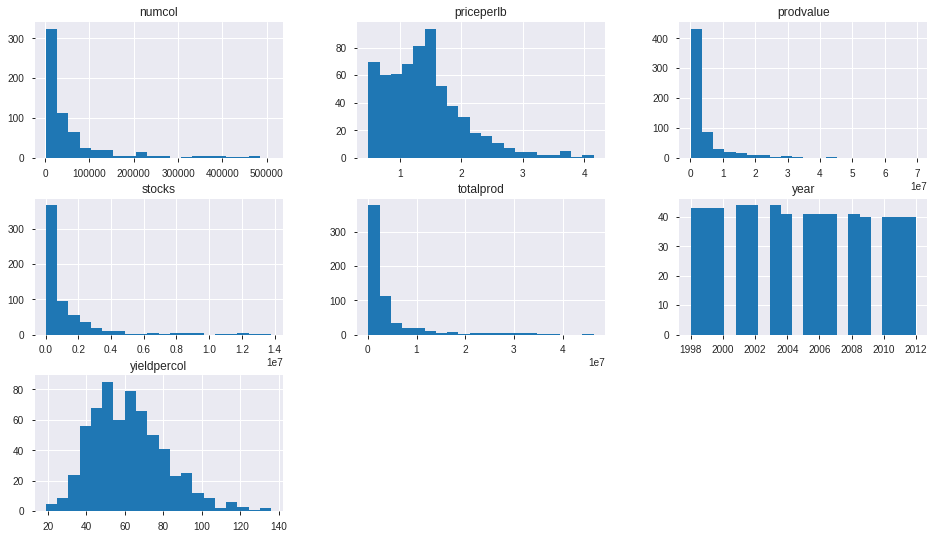

In [79]:

honey_df.hist(bins=20, figsize=(16,9));
plt.title('histogram');

In [52]:
for col in honey_df.columns:
  print(col)

state
numcol
yieldpercol
totalprod
stocks
priceperlb
prodvalue
year


# Pandas Profiling

In [13]:
pp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,626
Total Missing (%),0.0%
Total size in memory,39.2 KiB
Average record size in memory,64.2 B
Numeric,5
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import 

Data Source:
https://www.kaggle.com/jessicali9530/honey-production

# EDA

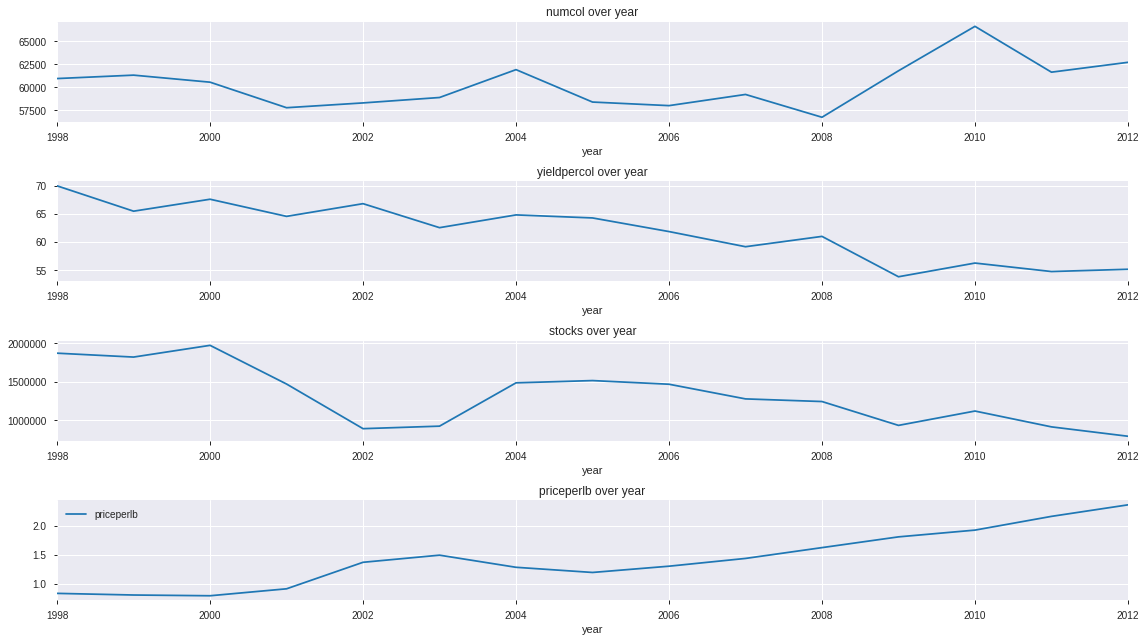

In [73]:
#
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
honey_df.groupby('year')['numcol'].mean().plot(figsize=(16,9), ax=ax1,)
ax1.set_title("numcol over year")
honey_df.groupby('year')['yieldpercol'].mean().plot(figsize=(16,9), ax=ax2)
ax2.set_title("yieldpercol over year")
honey_df.groupby('year')['stocks'].mean().plot(figsize=(16,9), ax=ax3)
ax3.set_title("stocks over year")
honey_df.groupby('year')['priceperlb'].mean().plot(figsize=(16,9), ax=ax4)
ax4.set_title("priceperlb over year")
fig.tight_layout(pad=1)
plt.legend()

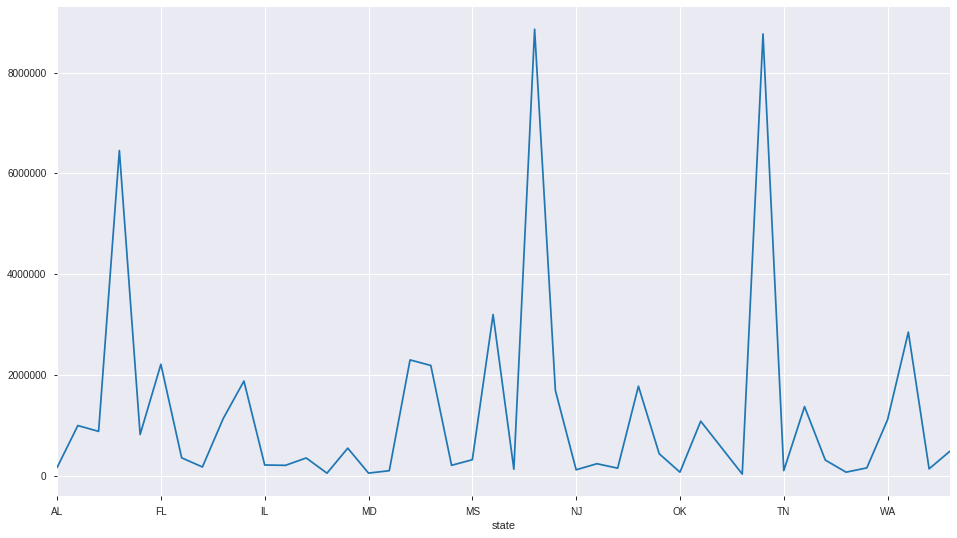

In [43]:
honey_df.groupby('state')['stocks'].mean().plot(figsize=(16,9))

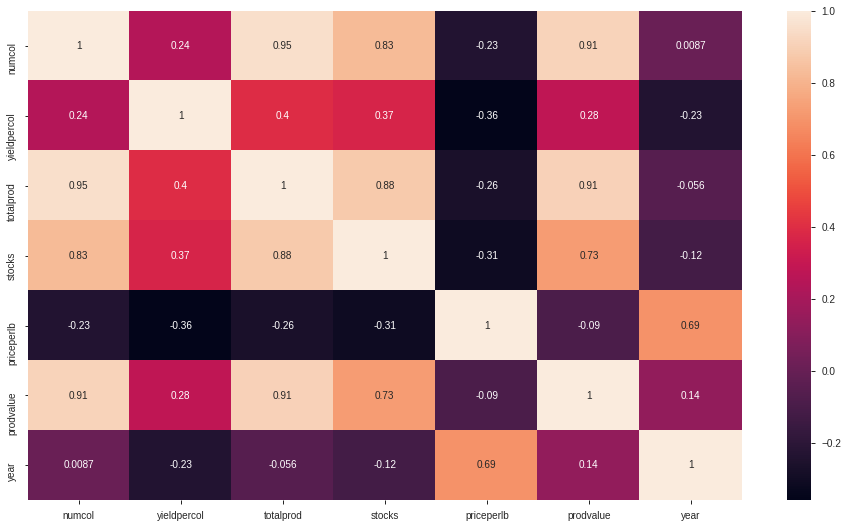

In [36]:
plt.figure(figsize=(16,9))
sns.heatmap(honey_df.corr(), annot=True)
plt.show()

# Map

In [0]:
m = folium.Map()

m